In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#variables to store mean and standard deviation for each feature
mu = []
std = []

In [37]:
def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:,:2], data[:, -1])
    normalize(data)
    return data[:,:2], data[:, -1]

In [38]:
def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))

In [39]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:,0], y, 'bo')
    plt.show()

In [40]:
def h(x,theta):
    return np.matmul(x, theta)

In [41]:
def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [42]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []
    
    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

In [43]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

In [44]:
def test(theta, x):
    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    print("Price of house: ", y)

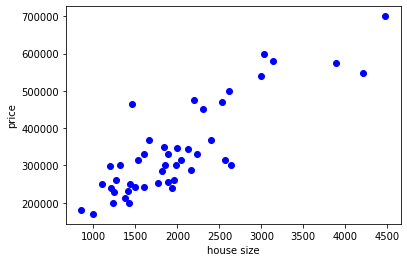

In [45]:
x,y = load_data("house_price_data.txt")

In [56]:
y = np.reshape(y, (len(y),1))
print(y.shape)

(46, 1)


In [47]:
x = np.hstack((np.ones((x.shape[0],1)), x))

In [48]:
theta = np.zeros((x.shape[1], 1))
print(theta)

[[0.]
 [0.]
 [0.]]


In [49]:
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)

In [50]:
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


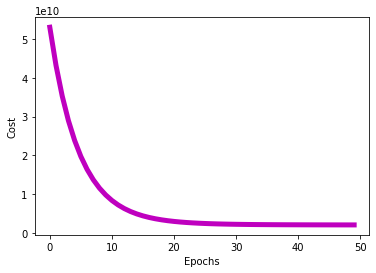

In [51]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

In [52]:
test(theta, [1600, 3])

Price of house:  [1.66842816e+08]


## Practice

In [98]:
mu = []
std = []

In [99]:
def plot_data(x, y):
    plt.xlabel("house_size")
    plt.ylabel("price")
    plt.plot(x,y,'bo')
    plt.show()

In [100]:
def normalize(data):
    for i in range(data.shape[1]-1):
        data[:,i] = ((data[:, i] - np.mean(data[:,i]))/np.std(data[:,i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:,i]))

In [101]:
def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["house_size","no of bedrooms", "price"]
    data = np.array(df, dtype="float32")
    #print(data.shape)
    plot_data(data[:,0], data[:,-1])
    normalize(data)
    return data[:,:2], data[:,-1]

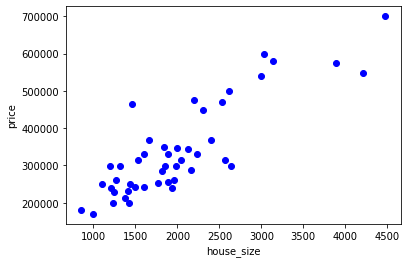

In [102]:
x, y = load_data("house_price_data.txt")

In [103]:
y = np.reshape(y, (y.shape[0],1))
x = np.hstack((np.ones((x.shape[0],1)),x))

In [107]:
theta = np.zeros((x.shape[1], 1))
print(theta)

[[0.]
 [0.]
 [0.]]


In [108]:
def h(x,theta):
    return np.matmul(x, theta)

In [ ]:
def cost_function(x, y, theta):
    return ((h(x,theta)-y).T@(h(x,theta)-y))/(2*x.shape[0])

In [109]:
def gradient_descent(x, y, theta, learning_rate, epochs):
    J_all = []
    m = x.shape[0]
    
    for _ in range(epochs):
        cost = (1/m)*x.T@(h(x,theta)-y)
        theta = theta - learning_rate*cost
        J_all.append(cost_function(x,y,theta))
    return J_all, theta

In [111]:
learning_rate = 0.01
epochs =50
J_all, theta = gradient_descent(x, y, theta, learning_rate, epochs)
loss = cost_function(x,y,theta)
print("Total loss", loss)
print("Theta:", theta)

Total loss [[2.49482588e+10]]
Theta: [[133950.12798292]
 [ 39826.8900331 ]
 [ 16828.23728666]]
